In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot

In [3]:
# Read 2015 data
happiness2015 = pd.read_csv('Happiness2015.csv')

In [4]:

#f, ax = plt.subplots(figsize=(12, 12))
#sns.heatmap(happiness2015.corr(), annot=True, linewidths=0.1, fmt='.1f', ax=ax, square=True)

happiness2015['Year'] = 2015
happiness2015_region= happiness2015[['Country', 'Happiness Score','Year','Region']]
happiness2015= happiness2015[['Country', 'Happiness Score','Year']]

    #Re-order column name for merging purpose
happiness2015= happiness2015[['Country', 'Happiness Score','Year']]

    #Read Happiness data for 2016
happiness2016=pd.read_csv('Happiness2016.csv')
happiness2016['Year'] = 2016
happiness2016= happiness2016[['Country', 'Happiness Score','Year']]
    #Re-order column name for merging purpose
happiness2016= happiness2016[['Country', 'Happiness Score','Year']]
    #Read Happiness data for 2017
happiness2017=pd.read_csv('Happiness2017.csv')
happiness2017['Year'] = 2017
happiness2017= happiness2017[['Country', 'Happiness.Score','Year']]
    #Rename column name for union purpose
happiness2017['Happiness Score']=happiness2017['Happiness.Score']
del happiness2017['Happiness.Score']
    #Re-order column name for union purpose
happiness2017= happiness2017[['Country', 'Happiness Score','Year']]



[]

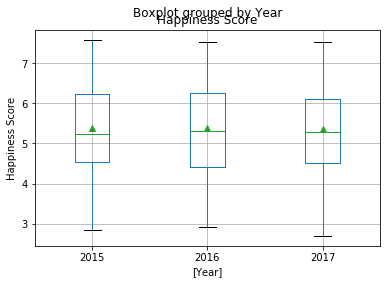

In [5]:
frames = [happiness2015, happiness2016, happiness2017]
year_comb = pd.concat(frames)
year_comb=year_comb.dropna(how='any',axis='rows')
year_comb=year_comb.drop(['Country'], axis=1)
year_comb
#year_comb.boxplot(column=['Happiness Score'], by='Year', ax=ax)

year_comb_ax=year_comb.boxplot(by='Year',showmeans=True)
year_comb_ax.set_ylabel('Happiness Score')

year_comb_ax.plot()

In [6]:

# Read features
lifeExpectancy = pd.read_csv("Life_expectancy_Index.csv", skiprows=1, encoding='iso-8859-1')
GDPperCapita = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_422141.csv", skiprows=4,
                           encoding='iso-8859-1')
EducationIndex = pd.read_csv("Education_Index.csv", skiprows=1, encoding='iso-8859-1')



In [7]:
# Data cleansing - filter unwanted rows
lifeExpectancy = lifeExpectancy[lifeExpectancy['HDI Rank (2017)'].str.contains('^[0-9]+$', na=False)]
lifeExpectancy = lifeExpectancy[pd.to_numeric(lifeExpectancy['2015'], errors='coerce').notnull()]

GDPperCapita = GDPperCapita[pd.to_numeric(GDPperCapita['2015'], errors='coerce').notnull()]

EducationIndex = EducationIndex[EducationIndex['HDI Rank (2017)'].str.contains('^[0-9]+$', na=False)]
EducationIndex = EducationIndex[pd.to_numeric(EducationIndex['2015'], errors='coerce').notnull()]

# Data cleansing - filter needed columns
lifeExpectancy = lifeExpectancy[['Country', '2015']]
lifeExpectancy['lifeExpectancy'] = lifeExpectancy['2015']
del lifeExpectancy['2015']

EducationIndex = EducationIndex[['Country', '2015']]
EducationIndex['EducationIndex'] = EducationIndex['2015']
del EducationIndex['2015']

GDPperCapita['GDPperCapita'] = GDPperCapita['2015']
GDPperCapita = GDPperCapita[['Country Name', '2015']]
GDPperCapita['Country'] = GDPperCapita['Country Name']
del GDPperCapita['Country Name']



In [8]:
#Merge features with Happiness score
data2015 = happiness2015_region.merge(GDPperCapita, on='Country').merge(EducationIndex, on='Country').merge(
    lifeExpectancy, on='Country')

data2015['GDPperCapita'] = data2015['2015']
del data2015['2015']

data2015["EducationIndex"] = pd.to_numeric(data2015["EducationIndex"])
data2015["lifeExpectancy"] = pd.to_numeric(data2015["lifeExpectancy"])
data2015["GDPperCapita"] = pd.to_numeric(data2015["GDPperCapita"])

######################## -------------------------------- ##################

In [9]:
######################## --------Plotting bar charts-------- ##################


In [10]:
region_list = list(data2015.Region.unique())
region_happiness_score_ratio = []

In [11]:
for i in region_list:
    x = data2015[data2015.Region == i]
    region_happiness_score_rate = sum(x["Happiness Score"])/len(x)
    region_happiness_score_ratio.append(region_happiness_score_rate)

In [12]:
data_bar = pd.DataFrame({'region_list':region_list, 'region_happiness_score_ratio':region_happiness_score_ratio})
new_index = (data_bar['region_happiness_score_ratio'].sort_values(ascending = False)).index.values
sorted_data = data_bar.reindex(new_index)

Text(0.5, 1.0, 'Happiness Score by Regions')

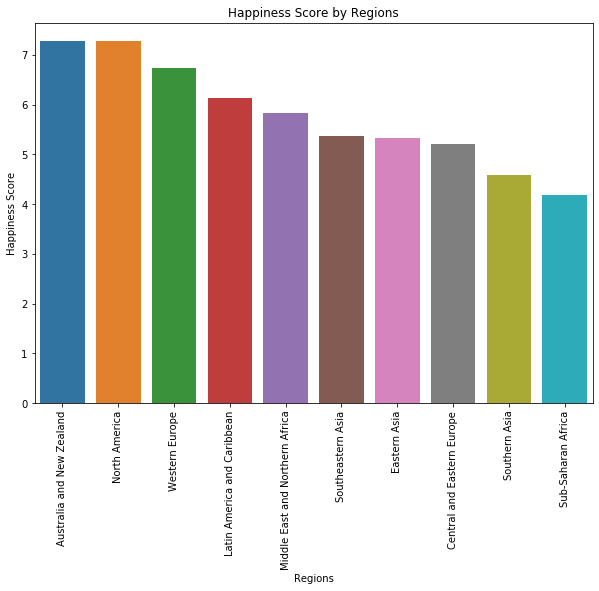

In [13]:
#visualisation
plt.figure(figsize=(10,7))
sns.barplot(x=sorted_data['region_list'], y=sorted_data['region_happiness_score_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Regions')
plt.ylabel('Happiness Score')
plt.title('Happiness Score by Regions')

In [14]:
######################## --------Plotting pie charts for distribution-------- ##################

In [15]:
labels = data2015.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange','lightcoral', 'gray', 'azure','pink']
explode = [0,0,0,0,0,0,0,0,0,0]
sizes = data2015.Region.value_counts().values


Text(0.5, 1.0, 'Distribution of the Countries by in the Report')

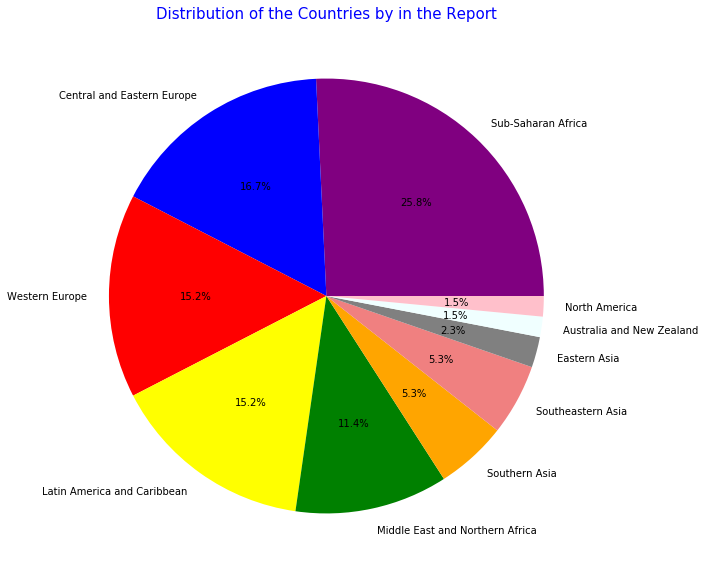

In [16]:
# visual
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the Countries by in the Report',color = 'blue',fontsize = 15)

In [17]:
filter2 = data2015['Happiness Score'] < 5.5
unhappy_countries = data2015[filter2]
unhappy_countries.Region.value_counts()

Sub-Saharan Africa                 34
Central and Eastern Europe         14
Southern Asia                       7
Middle East and Northern Africa     6
Southeastern Asia                   4
Latin America and Caribbean         3
Western Europe                      2
Eastern Asia                        2
Name: Region, dtype: int64

Text(0.5, 1.0, 'Distribution of the Least Happy Countries by Regions')

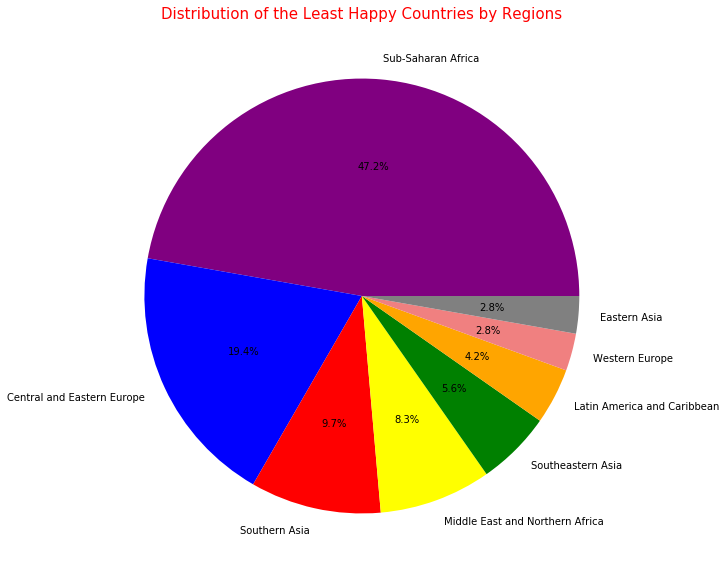

In [18]:
labels = unhappy_countries.Region.value_counts().index
colors = ['purple','blue','red','yellow','green','orange','lightcoral', 'gray', 'azure']
explode = [0,0,0,0,0,0,0,0]
sizes = unhappy_countries.Region.value_counts().values

# visualization
plt.figure(figsize = (10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of the Least Happy Countries by Regions',color = 'red',fontsize = 15)